In [31]:
import numpy as np
import pandas as pd
from sklearn import preprocessing


train = pd.read_csv("train.csv", dtype={"Age": np.float64}, )
test = pd.read_csv("test.csv", dtype={"Age": np.float64}, )

df = pd.concat([train])

In [304]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [305]:
df['Age'].fillna(df['Age'].mean(),inplace = True)
df['Fare'].fillna(df['Fare'].mean(),inplace = True)

In [306]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [307]:
df['Embarked'].mode()

0    S
dtype: object

In [308]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace = True)
df['Embarked'].unique()

for x in df.columns:
    if(df[x].isnull().any()):
        print(x)
df['Cabin'].fillna(" ",inplace = True)

Cabin


In [309]:
df['Family'] = df['SibSp']+df.Parch
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
df['Title'] = df['Title'].replace(['Rev','Dr','Col','Mlle','Major','Ms','Mme','Lady','Jonkheer','Sir','Countess','Dona','Capt','Don'],'others')
df['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
others     27
Name: Title, dtype: int64

In [310]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family', 'Title'],
      dtype='object')


In [311]:
drop_columns = ['Cabin','Name','PassengerId','Ticket','Parch','SibSp']
df.drop(drop_columns,axis = 1,inplace=True )
print(df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family',
       'Title'],
      dtype='object')


In [312]:
from sklearn import preprocessing

for i in ['Sex','Embarked','Title']:
    num=preprocessing.LabelEncoder()
    df[i]=num.fit_transform(df[i].astype(str))


In [313]:
x_train = df
y_train = x_train['Survived']
x_train.drop('Survived',axis = 1,inplace = True)


In [314]:
import sklearn.ensemble
from sklearn.metrics import confusion_matrix

model=sklearn.ensemble.RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

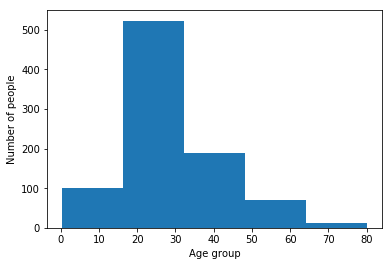

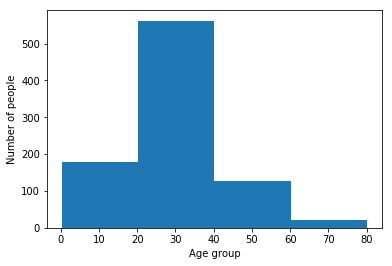

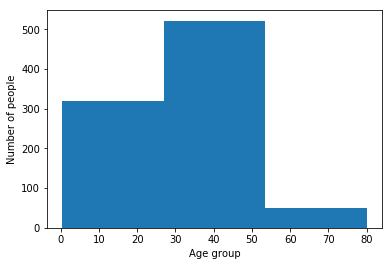

In [315]:
%matplotlib inline
import matplotlib.pyplot as plt

x = df['Age']
plt.hist(x,bins = 5)
plt.xlabel('Age group')
plt.ylabel('Number of people')
plt.show()

plt.hist(x,bins = 4)
plt.xlabel('Age group')
plt.ylabel('Number of people')
plt.show()

plt.hist(x,bins = 3)
plt.xlabel('Age group')
plt.ylabel('Number of people')
plt.show()

In [317]:
df['Age'] = pd.cut(df['Age'],5)
num = preprocessing.LabelEncoder()
df['Age'] = num.fit_transform(df['Age'].astype(str))

model = sklearn.ensemble.RandomForestClassifier()
model.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [280]:
x_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [302]:
x_test = df
predictions = model.predict(x_test)
x_test['PassengerId'] = pid
submission = pd.DataFrame({'PassengerId':x_test['PassengerId'],'Survived':predictions})
filename = 'Titanic Predictions 1.csv'
submission.to_csv(filename,index=False)


In [91]:
def cleaner(df):
    df['Age'].fillna(df['Age'].mean(),inplace = True)
    df['Fare'].fillna(df['Fare'].mean(),inplace = True)
    df['Embarked'].fillna(df['Embarked'].mode()[0],inplace = True)
    df['Cabin'].fillna(" ",inplace = True)
    df['Family'] = df['SibSp']+df.Parch
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.',expand=False)
    df['Title'] = df['Title'].replace(['Rev','Dr','Col','Mlle','Major','Ms','Mme','Lady','Jonkheer','Sir','Countess','Dona','Capt','Don'],'others')
    df['IsAlone'] = 0
    drop_columns = ['Name','Ticket']
    df.drop(drop_columns,axis = 1,inplace=True )
    return df

In [92]:
def new_features(df):
    df['Has_Cabin'] = df['Cabin'].apply(lambda x: 0 if x == ' ' else 1)
    df.loc[df['Family'] == 0,'IsAlone'] = 1
    df.loc[df['Sex'] == 'female','Sex'] = 0
    df.loc[df['Sex'] == 'male','Sex'] = 1
    
    df['FamilySizeGroup'] = 'Small'
    df.loc[df['Family'] == 0,'FamilySizeGroup'] = 'Alone'
    df.loc[df['Family'] >=4,'FamilySizeGroup'] = 'Big'
           
    df.loc[ df['Age'] <= 14, 'Age'] = 0
    df.loc[(df['Age'] > 14) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[ df['Age'] > 64, 'Age'] = 4

    df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
    df.loc[ df['Fare'] > 31, 'Fare'] = 3
    df['Fare'] = df['Fare'].astype(int)
        
    return df

In [93]:
def still_new_features(df):
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    family_mapping = {"Small": 0, "Alone": 1, "Big": 2}

    df['Title'] = df['Title'].map(title_mapping)
    df['FamilySizeGroup'] = df['FamilySizeGroup'].map(family_mapping)


    df['IsChildandRich'] = 0
    df.loc[(df['Age'] <= 0) & (df['Pclass'] == 1 ),'IsChildandRich'] = 1  
    df.loc[(df['Age'] <= 0) & (df['Pclass'] == 2 ),'IsChildandRich'] = 1
    
    for i in ['FamilySizeGroup','Embarked','Title']:
        num=preprocessing.LabelEncoder()
        df[i]=num.fit_transform(df[i].astype(str))
    df.drop('Cabin',axis = 1,inplace = True) 
#    df.drop('SibSp',axis = 1,inplace = True)
#    df.drop('Parch',axis = 1,inplace = True)
    df.drop('Family',axis = 1,inplace = True)
#    df.drop('Embarked',axis = 1,inplace = True)
    
    return df


In [94]:


train = pd.read_csv("train.csv", dtype={"Age": np.float64}, )
test = pd.read_csv("test.csv", dtype={"Age": np.float64}, )

train = cleaner(train)
test = cleaner(test)

train = new_features(train)
test = new_features(test)

train = still_new_features(train)
test = still_new_features(test)


In [95]:
test_pid = test['PassengerId']
test.drop('PassengerId',axis = 1,inplace = True)
train.drop('PassengerId',axis = 1,inplace = True)


In [96]:
x_train = train
x_test = test
y_train = train['Survived']
x_train.drop('Survived',axis = 1,inplace = True)

In [97]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone,Has_Cabin,FamilySizeGroup,IsChildandRich
0,3,1,1.0,1,0,0,2,0,0,0,0,0
1,1,0,2.0,1,0,3,0,2,0,1,0,0
2,3,0,1.0,0,0,1,2,1,1,0,1,0
3,1,0,2.0,1,0,3,2,2,0,1,0,0
4,3,1,2.0,0,0,1,2,0,1,0,1,0


In [98]:
from sklearn.ensemble import RandomForestClassifier


seed = 42
model =RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=5, min_samples_split=2,
                           min_samples_leaf=1, max_features='auto',    bootstrap=False, oob_score=False, 
                           n_jobs=1, random_state=seed,verbose=0)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)


In [99]:
submission = pd.DataFrame({'PassengerId':test_pid,'Survived':y_predict})

submission.head()

filename = 'Titanic Predictions 1.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename)


Saved file: Titanic Predictions 1.csv


In [388]:
train['Fare'][1]

3

In [379]:
train['Cabin'][2]

' '

In [341]:
full = [train,test]
for x in full:
    print(type(x))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
